# 미국 수제 맥주 산업 분석
2023.11.19

## 1. 프로젝트 개요
- **주제: 미국 수제 맥주 산업 분석**
- 설명: 미국의 수제 맥주 및 양조장 데이터를 분석하여 수제 맥주 산업을 이루는 요소들과 그 발전 방향을 탐색
- 사용 데이터셋
    - [Craft Beers Dataset](https://www.kaggle.com/datasets/nickhould/craft-cans/)(Kaggle): 미국의 캔맥주 2K+, 미국의 500개 이상 양조장 데이터
- 진행 절차 및 내용
    - 수제 맥주 데이터, 양조장 데이터를 로딩하여 각 컬럼별 EDA 및 결측치 처리
    - (추후 추가)

## 2. 데이터 로딩 및 분포 확인

### 2-1. beers.csv

#### 2-1-1. 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
beers_df = pd.read_csv('beers.csv', index_col=0)
beers_df

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


In [6]:
beers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2410 entries, 0 to 2409
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   abv         2348 non-null   float64
 1   ibu         1405 non-null   float64
 2   id          2410 non-null   int64  
 3   name        2410 non-null   object 
 4   style       2405 non-null   object 
 5   brewery_id  2410 non-null   int64  
 6   ounces      2410 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 150.6+ KB


In [7]:
beers_df.isna().sum()

abv             62
ibu           1005
id               0
name             0
style            5
brewery_id       0
ounces           0
dtype: int64

```beers_df```를 보면서 생각한 점
- 컬럼명 한글화
- abv, ibu 컬럼 null값 처리
- 컬럼별로 분포 확인

In [12]:
named_beers_df = beers_df.rename(columns={
    'abv': '알코올 도수',
    'ibu': '쓴 정도',
    # id는 안 바꾸기
    'name': '이름',
    'style': '스타일',
    # brewery_id는 안 바꾸기
    'ounces': '질량'
})

named_beers_df

,알코올 도수,쓴 정도,id,이름,스타일,brewery_id,질량
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


#### 2-1-2. 컬럼별 분포 확인(이름)

In [67]:
named_beers_df['이름'].nunique()

2305

데이터 개수가 2410개인데 이름의 고유값이 2305종류라는 것은 중복으로 들어간 게 105개라는 뜻 같다.

In [72]:
named_beers_df[named_beers_df['이름'].duplicated()].sort_values('이름')

,알코올 도수,쓴 정도,id,이름,스타일,brewery_id,질량
1254,0.051,20.0,360,#9,Fruit / Vegetable Beer,303,12.0
304,0.056,37.0,886,1327 Pod's ESB,Extra Special / Strong Bitter (ESB),380,12.0
305,0.056,37.0,612,1327 Pod's ESB,Extra Special / Strong Bitter (ESB),380,12.0
916,0.054,30.0,2202,312 Urban Pale Ale,American Pale Ale (APA),88,12.0
918,0.042,18.0,1829,312 Urban Wheat Ale,American Pale Wheat Ale,88,12.0
...,...,...,...,...,...,...,...
1320,0.072,75.0,2185,Tsunami IPA,American IPA,203,12.0
1696,0.047,25.0,2513,Vanilla Porter,American Porter,68,16.0
2173,0.051,11.0,2421,Watermelon Ale,Fruit / Vegetable Beer,108,12.0
558,0.047,NaN,638,White Zombie Ale,Witbier,331,12.0


중복되는 값들은 drop하는 게 좋겠다.

In [120]:
named_beers_df.drop_duplicates('이름', inplace=True)
named_beers_df

,알코올 도수,쓴 정도,id,이름,스타일,brewery_id,질량
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


#### 2-1-3. 컬럼별 분포 확인(알코올 도수)

In [121]:
named_beers_df['알코올 도수'].describe().to_frame()

,알코올 도수
count,2245.000000
mean,0.059923
std,0.013555
min,0.001000
25%,0.050000
50%,0.057000
75%,0.068000
max,0.128000


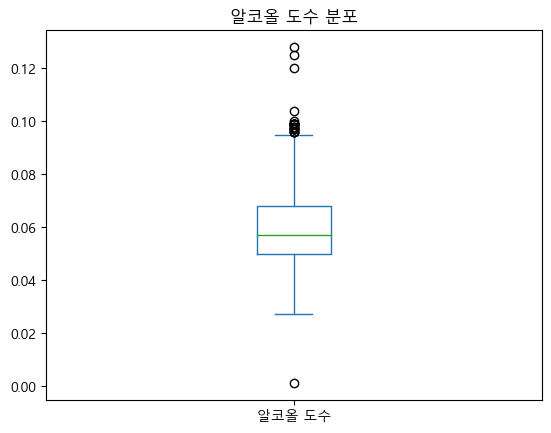

In [123]:
named_beers_df['알코올 도수'].plot(kind='box')
plt.title('알코올 도수 분포')
plt.show()

우리가 흔히 생각하는 맥주의 도수에 분포가 몰려있는데, 12도 이상의 높은 분포를 보이는 맥주들도 있다.

In [124]:
named_beers_df[named_beers_df['알코올 도수'] == np.max(named_beers_df['알코올 도수'])]

,알코올 도수,쓴 정도,id,이름,스타일,brewery_id,질량
2278,0.128,NaN,2565,Lee Hill Series Vol. 5 - Belgian Style Quadrup...,Quadrupel (Quad),51,19.2


알코올 도수가 최대값인 맥주는 Lee Hill Series Vol. 5 - Belgian Style Quadrup... 로 12.8%에 달한다.

In [125]:
named_beers_df[named_beers_df['알코올 도수'] == np.min(named_beers_df['알코올 도수'])]

,알코올 도수,쓴 정도,id,이름,스타일,brewery_id,질량
2266,0.001,NaN,606,Scotty K NA,Low Alcohol Beer,522,16.0


알코올 도수가 최소값인 맥주는 Scotty K NA로 0.1%다. 음료수 아님?

In [126]:
print(f"결측치 개수: {named_beers_df['알코올 도수'].isna().sum()}")
print(f"결측치 비율: {round(named_beers_df['알코올 도수'].isna().sum() * 100 / named_beers_df['알코올 도수'].count(), 2)}%")

결측치 개수: 60
결측치 비율: 2.67%


#### 2-1-3. 컬럼별 분포 확인(쓴 정도)

In [127]:
named_beers_df['쓴 정도'].describe().to_frame()

,쓴 정도
count,1326.000000
mean,42.957768
std,25.972636
min,4.000000
25%,22.000000
50%,35.000000
75%,64.000000
max,138.000000


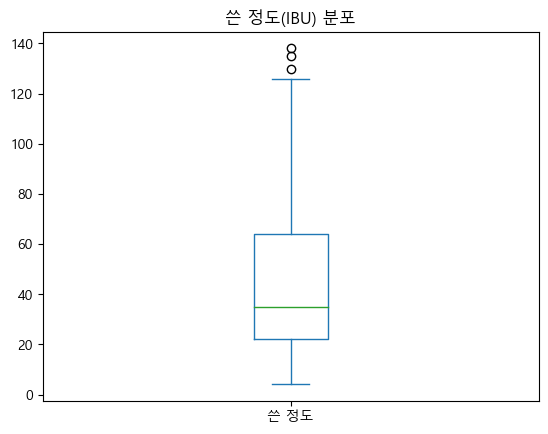

In [128]:
named_beers_df['쓴 정도'].plot(kind='box')
plt.title('쓴 정도(IBU) 분포')
plt.show()

쓴 정도는 21 ~ 64에 몰려있다. 찾아봤을 때에는 0부터 100까지의 스케일로 되어있다고 했는데 왜 138 같은 애가 있는지 잘 모르겠다.

In [129]:
named_beers_df[named_beers_df['쓴 정도'] == np.max(named_beers_df['쓴 정도'])]

,알코올 도수,쓴 정도,id,이름,스타일,brewery_id,질량
147,0.082,138.0,980,Bitter Bitch Imperial IPA,American Double / Imperial IPA,374,12.0


이름부터가 Bitter인 거 보니까 작정하고 쓰게 만들었나... 원래 맥주면 100 안에 들어와야 하는데 그것보다도 훨씬 써서 138인가?

In [130]:
named_beers_df[named_beers_df['쓴 정도'] == np.min(named_beers_df['쓴 정도'])]

,알코올 도수,쓴 정도,id,이름,스타일,brewery_id,질량
106,0.056,4.0,1350,Summer Solstice,Cream Ale,171,12.0
112,0.056,4.0,753,Summer Solstice Cerveza Crema (2009),Cream Ale,171,12.0
117,0.056,4.0,77,Summer Solstice (2011),Cream Ale,171,12.0


나는 쓴 맛을 싫어해서 이 친구들이 가장 좋을 것 같다. 셋 다 Cream Ale 스타일인 걸 보면 나중에 스타일별로 알코올 도수, 쓴 정도 보는 것도 재밌겠다.

In [131]:
print(f"결측치 개수: {named_beers_df['쓴 정도'].isna().sum()}")
print(f"결측치 비율: {round(named_beers_df['쓴 정도'].isna().sum() * 100 / named_beers_df['알코올 도수'].count(), 2)}%")

결측치 개수: 979
결측치 비율: 43.61%


결측치 겁나 많네...

#### 2-1-5. 컬럼별 분포 확인(스타일)

In [132]:
named_beers_df['스타일'].nunique()

99

In [133]:
beer_styles_df = named_beers_df['스타일'].value_counts().to_frame().rename(columns={'스타일': '개수'})
beer_styles_df

,개수
American IPA,409
American Pale Ale (APA),233
American Amber / Red Ale,131
American Blonde Ale,103
American Double / Imperial IPA,99
...,...
American Malt Liquor,1
Wheat Ale,1
Flanders Red Ale,1
Kristalweizen,1


In [134]:
print("개수가 10개 미만인 스타일:", end=' ')
print(f"{int(beer_styles_df[beer_styles_df['개수'] < 10].count())}종")

print("개수가 10개 이상 50개 미만인 스타일:", end=' ')
print(f"{int(beer_styles_df[(beer_styles_df['개수'] >= 10) & (beer_styles_df['개수'] < 50)].count())}종")

print("개수가 50개 이상인 스타일:", end=' ')
print(f"{int(beer_styles_df[beer_styles_df['개수'] >= 50].count())}종")

개수가 10개 미만인 스타일: 51종
개수가 10개 이상 50개 미만인 스타일: 38종
개수가 50개 이상인 스타일: 10종


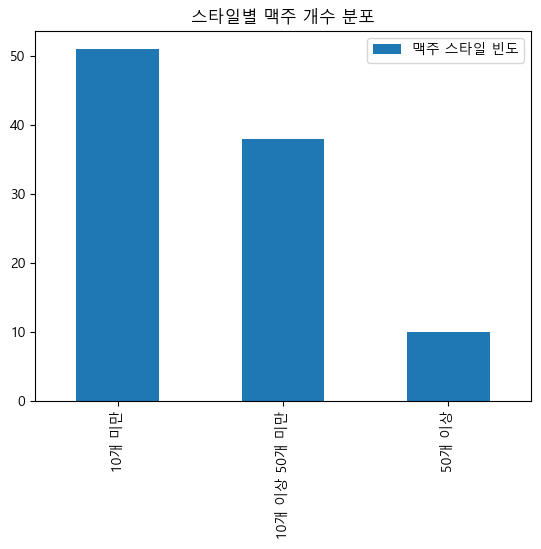

In [169]:
pd.DataFrame({
    '10개 미만': int(beer_styles_df[beer_styles_df['개수'] < 10].count()),
    '10개 이상 50개 미만': int(beer_styles_df[(beer_styles_df['개수'] >= 10) & (beer_styles_df['개수'] < 50)].count()),
    '50개 이상': int(beer_styles_df[beer_styles_df['개수'] >= 50].count())
}, index=['맥주 스타일 빈도']).T.plot(kind='bar')

plt.title('스타일별 맥주 개수 분포')
plt.show()

개수가 10개 미만인 스타일이 51종이나 있다.

In [170]:
beer_styles_df[beer_styles_df['개수'] < 10]['개수'].value_counts().to_frame().reset_index().rename(columns={
    '개수': '맥주 스타일 빈도',
    'index': '개수'
}).sort_values('개수').set_index('개수')

,맥주 스타일 빈도
개수,
1,10
2,7
3,9
4,4
5,5
6,8
7,4
9,4


보니까 개수가 1개뿐인 스타일도 10종이나 있다. 맥주 스타일이 이렇게 다양하게 있구나...

#### 2-1-6. 컬럼별 분포 확인(질량)

In [136]:
named_beers_df['질량'].describe()

count    2305.000000
mean       13.587375
std         2.363536
min         8.400000
25%        12.000000
50%        12.000000
75%        16.000000
max        32.000000
Name: 질량, dtype: float64

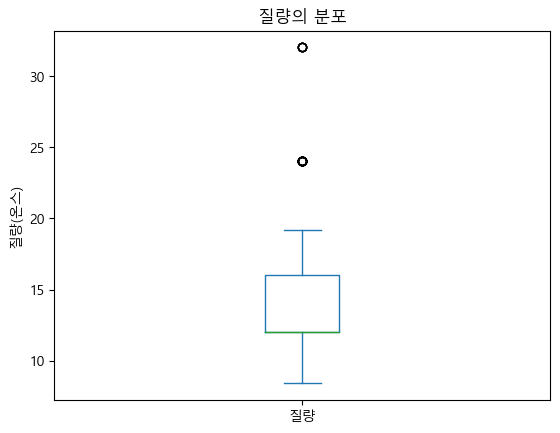

In [137]:
named_beers_df['질량'].plot(kind='box')
plt.title('질량의 분포')
plt.ylabel('질량(온스)')
plt.show()

12온스가 압도적으로 많은 분포를 띠는 모양이다. 12온스는 약 340g이다. 우리가 흔히 보는 355ml짜리 캔을 말하는 것 같다.

In [138]:
named_beers_df['질량'].value_counts()

12.0    1463
16.0     800
24.0      22
19.2      13
32.0       5
8.4        1
16.9       1
Name: 질량, dtype: int64

16온스는 454g이니까 500ml 캔인 것 같다. 역시 355ml와 500ml 용량이 압도적인 분포를 보인다.

In [139]:
named_beers_df[named_beers_df['질량'] == np.max(named_beers_df['질량'])]

,알코올 도수,쓴 정도,id,이름,스타일,brewery_id,질량
1374,0.050,NaN,2442,Cortez Gold,Belgian Pale Ale,98,32.0
1375,0.068,66.0,2441,Mission IPA,American IPA,98,32.0
1376,0.048,44.0,1460,El Conquistador Extra Pale Ale,American Pale Ale (APA),98,32.0
1377,0.092,75.0,1459,Shipwrecked Double IPA,American Double / Imperial IPA,98,32.0
1554,NaN,NaN,1796,The CROWLER™,NaN,166,32.0


가장 큰 맥주는 32온스(=907g)이다. 분명 캔맥주 데이터랬는데 1L짜리 캔이 있다고?!

In [140]:
named_beers_df[named_beers_df['질량'] == np.min(named_beers_df['질량'])]

,알코올 도수,쓴 정도,id,이름,스타일,brewery_id,질량
21,0.099,92.0,1036,Lower De Boom,American Barleywine,368,8.4


가장 작은 맥주는 8.4온스(=238g)이다. 

### 2-2. breweries.csv

#### 2-2-1. 데이터 불러오기

In [141]:
breweries_df = pd.read_csv('breweries.csv')
breweries_df

,Unnamed: 0,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
...,...,...,...,...
553,553,Covington Brewhouse,Covington,LA
554,554,Dave's Brewfarm,Wilson,WI
555,555,Ukiah Brewing Company,Ukiah,CA
556,556,Butternuts Beer and Ale,Garrattsville,NY


In [142]:
breweries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  558 non-null    int64 
 1   name        558 non-null    object
 2   city        558 non-null    object
 3   state       558 non-null    object
dtypes: int64(1), object(3)
memory usage: 17.6+ KB


In [143]:
breweries_df.isna().sum()

Unnamed: 0    0
name          0
city          0
state         0
dtype: int64

```breweries_df```를 보면서 생각한 것
- 있어야 할 ```brewery_id``` 컬럼이 없다. 아마 맨 앞에 index로 들어가야 하는 컬럼(```Unnamed: 0```)이 그 역할인 것 같다.
- 솔직히 얘는 컬럼명 알아보기 쉬워서 한글화 딱히 필요없을 듯
- 근데 추후 merge할 때를 생각하면 컬럼명에 양조장을 붙여야 더 구체적으로 설명이 될 것 같다
- 정수형 데이터가 하나도 없고 전부 텍스트로 구성되어 있다
- 결측치 하나도 없어서 아주 마음에 든다

In [144]:
named_breweries_df = breweries_df.rename(columns={
    'Unnamed: 0': 'brewery_id', 'name': '양조장 이름', 'city': '양조장 소재 도시', 'state': '양조장 소재 주'
})

named_breweries_df

,brewery_id,양조장 이름,양조장 소재 도시,양조장 소재 주
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
...,...,...,...,...
553,553,Covington Brewhouse,Covington,LA
554,554,Dave's Brewfarm,Wilson,WI
555,555,Ukiah Brewing Company,Ukiah,CA
556,556,Butternuts Beer and Ale,Garrattsville,NY


#### 2-2-2. 컬럼별 분포 확인(양조장 이름)

In [145]:
named_breweries_df['양조장 이름'].nunique()

551

In [146]:
named_breweries_df[named_breweries_df['양조장 이름'].duplicated()].sort_values('양조장 이름')

,brewery_id,양조장 이름,양조장 소재 도시,양조장 소재 주
95,95,Blackrocks Brewery,Marquette,MA
414,414,Blue Mountain Brewery,Arrington,VA
456,456,Lucette Brewing Company,Menominie,WI
503,503,Oskar Blues Brewery,Lyons,CO
275,275,Otter Creek Brewing,Middlebury,VT
371,371,Sly Fox Brewing Company,Pottstown,PA
138,138,Summit Brewing Company,St Paul,MN


7개의 중복된 양조장이 들어가 있다.

In [147]:
named_breweries_df.drop_duplicates('양조장 이름', inplace=True)
named_breweries_df

,brewery_id,양조장 이름,양조장 소재 도시,양조장 소재 주
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
...,...,...,...,...
553,553,Covington Brewhouse,Covington,LA
554,554,Dave's Brewfarm,Wilson,WI
555,555,Ukiah Brewing Company,Ukiah,CA
556,556,Butternuts Beer and Ale,Garrattsville,NY


#### 2-2-3. 컬럼별 분포 확인(양조장 소재 도시)

In [172]:
cities_df = named_breweries_df['양조장 소재 도시'].value_counts().to_frame().rename(columns={'양조장 소재 도시': '개수'})
cities_df

,개수
Portland,17
Chicago,9
Seattle,9
Boulder,9
San Diego,8
...,...
Henderson,1
Buellton,1
Dripping Springs,1
Gloucester,1


In [177]:
cities_df['개수'].value_counts().to_frame().reset_index().sort_values('index').rename(columns={
    'index': '개수', '개수': '도시 수'
}).set_index('개수')

,도시 수
개수,
1,299
2,51
3,17
4,5
5,1
6,1
8,3
9,3
17,1


양조장이 1개 있는 도시가 299개나 있다. 양조장이 굉장히 다양하게 분포되어 있음을 파악할 수 있다.

#### 2-2-4. 컬럼별 분포 확인(양조장 소재 주)

In [194]:
states_df = named_breweries_df['양조장 소재 주'].value_counts().to_frame().reset_index().rename(columns={
    '양조장 소재 주': '개수', 'index': '주'
})
states_df

,주,개수
0,CO,46
1,CA,39
2,MI,32
3,OR,29
4,TX,28
5,PA,24
6,WA,23
7,MA,22
8,IN,22
9,NC,19


아 예... 그렇군요

## 3. 데이터 분석

추후 진행할 만한 분석 내용 브레인스토밍
- **(맥주 회사 제품 기획팀의 입장)** 우리 회사는 미국 수제 맥주 시장에 신규 진입하려고 하는 상황이다. 미국 시장에서 성공하려면 제품을 어떻게 기획하고, 포지셔닝을 어떻게 잡아야 할까?
    - 알코올 도수와 쓴 정도 사이에는 유의미한 상관관계가 있을까?
    - 미국에서 가장 많이 생산되는 맥주 스타일은 무엇일까? → 해당 스타일의 특징 및 인기 비결은 무엇일까? (=많이 생산되는 스타일이 유리할까?)
- **(미국 주 행정당국 입장)** 우리 지역은 미국 내에서 상대적으로 주류 산업이 활성화되지 않은 지역이다. 주류 산업의 활성화를 위해 수제 맥주 산업을 촉진시키고 싶다. 소규모 양조장의 창업을 돕는 정책이 유효할 것이라고 판단했기에, 양조장의 입지 선정을 지원하기 위한 분석을 진행하고자 한다.
    - 많이 생산되는 지역은 그 이유가 무엇일까? → 어떤 장점을 본받아야 할까?
    - 적게 생산되는 지역의 이유는 무엇일까? → 어떤 단점을 보완해야 할까?
- **(이우진 입장)** 그냥 궁금하다.
    - 내가 좋아하는 맥주 스타일은 뭘까? → 내가 좋아하는 유형을 사람들도 좋아할까? (=시장 점유율이 높을까?)

## 4. 결과 해석 및 후기